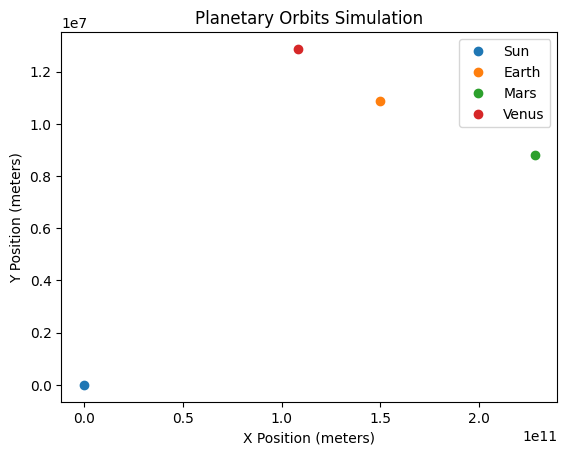

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
G = 6.674 * 10**(-11)  # Gravitational constant (m^3 kg^(-1) s^(-2))
AU = 149.6 * 10**9     # Astronomical Unit (meters)
day_to_seconds = 24 * 60 * 60  # Convert days to seconds

# Define planetary parameters
class Planet:
    def __init__(self, mass, initial_position, initial_velocity, name):
        self.mass = mass
        self.position = initial_position
        self.velocity = initial_velocity
        self.name = name

# Simulation parameters
time_step = 1  # Time step in days
num_steps = 365  # Number of time steps for simulation

# Initialize planets
sun = Planet(1.989 * 10**30, np.array([0.0, 0.0]), np.array([0.0, 0.0]), 'Sun')
earth = Planet(5.972 * 10**24, np.array([AU, 0.0]), np.array([0.0, 29783.0]), 'Earth')
mars = Planet(6.39 * 10**23, np.array([1.524 * AU, 0.0]), np.array([0.0, 24100.0]), 'Mars')
venus = Planet(4.87 * 10**24, np.array([0.723 * AU, 0.0]), np.array([0.0, 35260.0]), 'Venus')

planets = [sun, earth, mars, venus]

# Simulation loop
for step in range(num_steps):
    # Calculate gravitational forces and update positions and velocities
    for i in range(len(planets)):
        for j in range(i + 1, len(planets)):
            # Calculate the relative position vector
            relative_position = planets[j].position - planets[i].position

            # Calculate the gravitational force
            force_magnitude = G * planets[i].mass * planets[j].mass / np.linalg.norm(relative_position)**3
            gravitational_force = force_magnitude * relative_position

            # Update velocities
            planets[i].velocity += gravitational_force / planets[i].mass * time_step
            planets[j].velocity -= gravitational_force / planets[j].mass * time_step

    # Update positions
    for planet in planets:
        planet.position += planet.velocity * time_step

# Visualization using Matplotlib
for planet in planets:
    plt.plot(planet.position[0], planet.position[1], 'o', label=planet.name)

plt.title('Planetary Orbits Simulation')
plt.xlabel('X Position (meters)')
plt.ylabel('Y Position (meters)')
plt.legend()
plt.show()